# Report of Project 05: Implementation and Evaluation of Machine Learning (Support Vector Machine) Segmentation
## Data analysis project - B.Sc. Molecular Biotechnology Heidelberg University
### 19 Juli 2021
### Authors: Michelle Emmert, Juan Andre Hamdan, Laura Sanchis Pla and Gloria Timm

# Abstract
Support Vector Machines, also known as SVMs, are supervised learning models with associated learning algorithms that
analyze data for classification and regression analysis. One of their many uses is in nuclei segmentation for cell counting and cancer grading.
This report describes an algorithm designed around an SVM, which was developed using three sets of microscopic images.
Pursuing the overall goal to implement and evaluate an SVM for cell nuclei segmentation, the algorithm contains two pre-processing
methods: Gaussian filtering and Watershed. To prepare the data for the SVM, two methods for data reduction were applied:
Principal Component Analysis (PCA) and Tiles. *hier noch kurz erklären??*
*SVM*
To evaluate the algorithms' performance the Dice Score was used.
We find that *XXX*.


*TO BE DONE*

Their theoretical foundations and their experimental success encourage further research on their characteristics, as well
as their further use.



# Table of contents
**1. Introduction** <br>
**2. The Dataset** <br>
**3. The algorithm's pipeline** <br>
**4. Pre-processing** <br>
**4.1 Gaussian filter** <br>
**4.2 Watershed** <br>
**4.3 Principle Component Analysis** <br>
**5. Data reduction** <br>
**5.2 Tiles** <br>
**6. Synthetic Images** <br>
**6.1 Definition and Goal** <br>
**6.2 Image composition** <br>
**6.3 Domain randomization** <br>
**7. Support Vector Machine** <br>
**7.1 The Mathematical Background** <br>
**7.2 The loss function** <br>
**7.3 Stochastic gradient decent to minimize the loss gradient** <br>
**7.4 K-Fold Cross validation** <br>
**8. Evaluation using the Dice coefficient** <br>
**8.1 The Theory behind the Dice Coefficient** <br>
**8.2 Unittesting the Dice Coefficient** <br>
**9. Results** <br>
**10. Discussion** <br>
**11. Bibliography**

# List of abbreviations
| Abbreviation | Full name |
| --- | --- |
| CD | cluster of differentiation |
| CV | K-Fold Cross validation |
| FN | false negative |
| FP | false positive |
| GFP | Green fluorescent protein |
| ML | machine learning |
| PCA  | Principle Component Analysis |
| PC | Principle Component |
| SGD | Stochastic Gradient Descent |
| SVM | Support Vector Machine |
| TP | True positive |


# 1. Introduction
Image segmentation is a process, during which important features of a picture are extracted, to aid analysis and retrieval
of information. This is done by assigning labels to all pixels of the image. Pixels sharing defined traits, are assigned the same label. (Khan and Ravi, 2013)
Nuclei segmentation is a subform of image segmentation. Its goal is to automatically separate nuclei from their background.
This allows machine counting of nuclei and cells (Schüffler et al., 2013).

During laboratory work, manual cell counting of microscopic images is a cumbersome and error-prone process. However, since
the number of cells contains important information, counting remains indispensable.
Automatic cell counting via nuclei segmentation is therefore used to accelerate and improve the overall procedure. (Schüffler et al., 2013)

In addition to its use in biological laboratories, nuclei segmentation also advances cancer grading in medical practice.
Cancer grading describes the process of classifying and grading a cancer based on cancer histopathology. It is
an essential step in quantifying the degree of malignancy and thus key to predict patient prognosis and prescribe a treatment.
Currently, cancer grading is still often done manually via visual analysis of tissue samples.
This method is somewhat problematic given its inter- and intra-observer variability regarding the gradings quality, its low reproducibility
as well as the disproportionate time needed for completion. (Veta et al., 2013; Schüffler et al., 2013)

Using an SVM, is an auspicious way to accomplish nuclei segmentation (Schüffler et al., 2013).
We use the SVM to differentiate between foreground and background pixels. Foreground pixels are subsequently labeled as
nuclei and displayed white. Background pixels are colored black.

The images require pre-processing to enhance the picture quality, a crucial prerequisite for an effective image segmentation
via SVM. To evaluate the segmentation quality, the Dice Coefficient is used.

# 2. The Dataset
The data consist of three datasets with a total of 28 images, all showing nuclei.
The pictures of the first dataset show GFP-transfected GOWT1 mouse embryonic stem cells. The second set of images display
Histone-2B-GFP expressing HeLa cells, while our third set consists of pictures of mouse embryonic fibroblasts, in which
CD-antigens were tagged with enhanced-GFP.
All images are microscopic images of nuclei, however the three sets vary greatly in other features with additional challenges for our image analysis.
•	different formats (1024 x 1024, 1100 x 700, 1344 x 1024),
•	acquired  differently
•	different numbers of nuclei, within a range of 15-65 nuclei per image.
•	different brightness and resolution
•	white flashes, clustering of nuclei or nuclei leaving the image or undergoing mitosis.

# 3. The algorithm pipeline

*INSERT IMAGES OF ALGORITHM*


# 4. Pre-processing
We implemented two different pre-processing methods in our SVM algorithm in order to improve the raw
images quality and consequently achieve better segmentation results.

## 4.1 Gaussian filter
As our first pre-processing method, we used a Gaussian filter. This technique was shown to be particularly useful for the filtering of noisy pictures.
This is the case, since the results of the filtering show a relative independence on the variance value of the Gaussian
kernel (Gedraite, E. et al. 2011). It might turn out to be problematic that the use of Gaussian filters can give
rise to edge position displacement, edges vanishing, and phantom edges (Deng, G. et al. 1993).

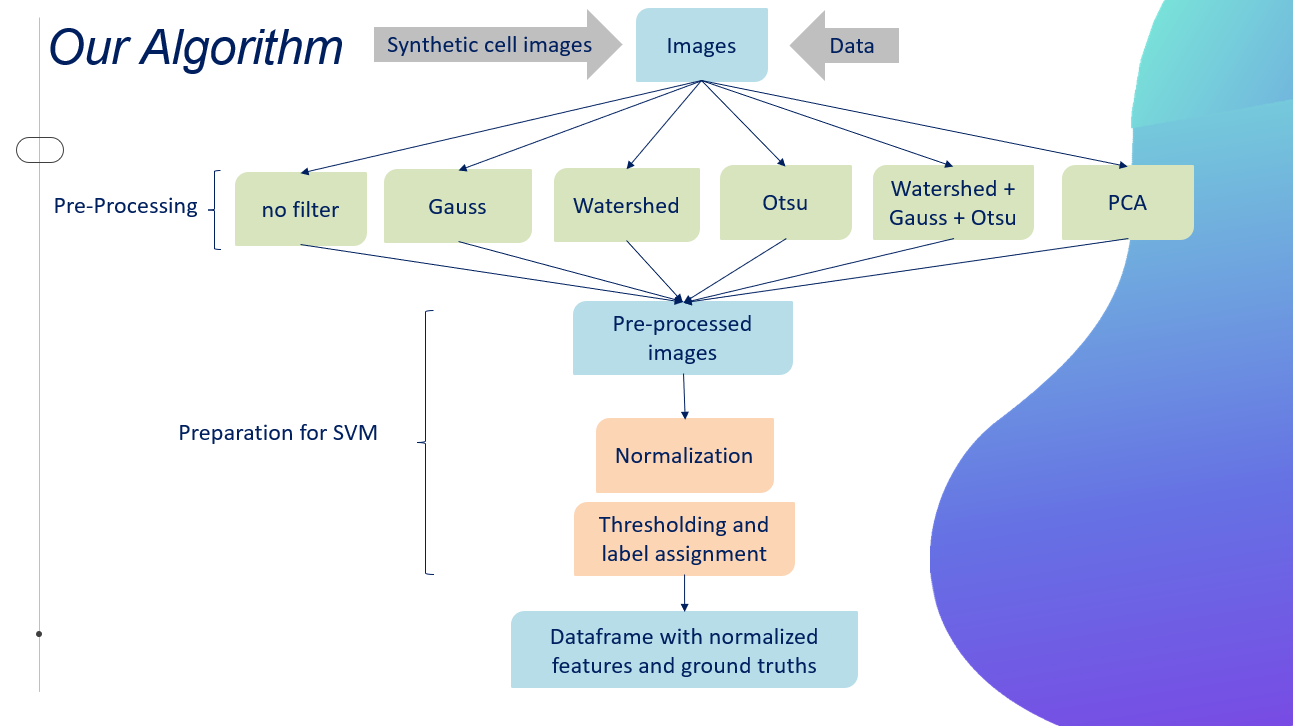

In [22]:
from skimage import io
import matplotlib.pyplot as plt
import cv2
original = cv2.imread('../Data/N2DH-GOWT1/img/t52.tif')  # apply the gauss filter
filtered = cv2.GaussianBlur(original, (5, 5), 0)
plt.imshow(filtered)
plt.title('Gauss Filtered')
plt.show()

## 4.2 Watershed
As our second pre-processing method, we used Watershed, a gradient-ascend-based super pixel algorithm that has its origins in mathematical morphology.
In watershed segmentation an image is regarded as a topographic landscape with ridges and valleys. The elevation values of the
landscape are typically defined by the gray values of the respective pixels or their gradient magnitude.

To make Watershed easier to understand, one can think of an image as a surface. The bright pixels represent mountain tops, while the dark
pixels symbolize valleys. The surface is punctured in some valleys and then slowly submerged into a water bath. As the water
pours into each puncture, it starts to fill the valleys. However, the water from different punctures should not mix.
Therefore, dams need to be built where different waters first touch.
These dams at the boundaries of the water basins are equivalent to the boundaries of image objects.
The output image of a watershed algorithm thus is the original image, in which every object is encircled.

In [ ]:
from SVM_Segmentation.preprocessing.watershed import watershed
if __name__ == '__main__':
    ws = watershed("/Users/juanandre/PycharmProjects/2021-topic-04-team-05/Data/N2DH-GOWT1/img/t52.tif")
    plt.imshow(ws)
    plt.show()

## 4.3 Principal Component Analysis
Principal component analysis simplifies the complexity of high-dimensional data by geometrically projecting them onto lower dimensions
called principal components (PCs) while preserving as much of the data's variation as possible (Lever, 2017).
These principal components are eigenvectors of the data's covariance matrix and often computed by
eigendecomposition of the data covariance matrix. (Hedge, A. 2006)

PCA essentially rotates the set of points around their mean in order to align them with the principal components.
This moves as much of the variance as possible into the first few dimensions. The values in the remaining dimensions,
therefore, tend to be small and may be dropped with minimal loss of information. (Jolliffe, I. 2016)

We perform the PCA as part of our pre-processing. By retaining a selected number of PCs that together explain 95% of the variance of the
image, we aim to reduce noise and increase contrast of the original image.
Therewith we hope to improve the quality of the SVMs segmentation.

After selecting the PCs, the image is uptransformed to its initial size.

Because SVM is an algorithm that requires its features to be normalized, the PCA is performed with StandardScaler applied.
This function scales the features to have zero as the mean and a standard deviaton of 1, to give
it the feel and the properties of a standard normal distribution. As a positive side effect this also refines the SVMs prediction accuracy.

In [ ]:
from SVM_Segmentation.preprocessing.pca import convert_pca
if __name__ == '__main__':
    image_read1 = io.imread('/Users/juanandre/PycharmProjects/2021-topic-04-team-05/Data/N2DH-GOWT1/img/t52.tif')
    pca1 = convert_pca(image_read1, 0.9)
    plt.imshow(pca1)
    plt.show()

# 5. Data Reduction
As the images in our dataset consist of more than one million pixels each, running the SVM would take a lot of computational power and runtime.
To decrease both, data reduction should be performed beforehand.
The two possibilities we thought of, are resize form skimage and cutting the image into tiles before averaging over each tile.

Resize from skimage cuts the image into a pre-defined scaling factor. We cut all images to 250 x 250.

## 5.1 Tiles
While PCA reduces data specifically, tiles-rendering is a simple approach that reduces data unspecifically by
exploiting the fundamental properties of a problem space.
The concept behind tiles is to save computational power, by splitting the image into multiple sets of N x N tiles
and then calculate the average of each tile. The average intensity value of a specific tile is assigned to all pixels, belonging to
this tile. Lastly, all tiles are reassembled to form the resulting image. (Rastar, A. 2019)

As our tiles algorithm reduced the images quality in large measure, we decided to not use it as part of our algorithm.

In [ ]:
from SVM_Segmentation.preprocessing.tiles import tiles
from SVM_Segmentation.pixel_conversion import one_d_array_to_two_d_array
from skimage import io
image = io.imread('/Users/juanandre/PycharmProjects/2021-topic-04-team-05/Data/N2DH-GOWT1/img/t52.tif')
tiled = tiles(image, 50)
tiled = one_d_array_to_two_d_array(tiled)
plt.imshow(tiled)
plt.show()

# 6. Synthetic Images
## 6.1 Definition and Goal
The basic idea behind creating synthetic images is to use algorithms and already available images to generate
new images (Dunn et al., 2019). Our first objective was to simply use these new images to test our code for the dice score.
But while researching on this topic, we realized that synthetic images have an immense potential, especially for the training
phase of a machine learning algorithm.
This is particularly useful as our data encompasses only 28 images, which leads to a training data set of 27 images at max.
By expanding our training set with diverse images of good quality, we expect a more accurate model (Mayer et al., 2017).
There are various methods for the generation of synthetic images (Ward et al., 2019). Because of the scope of our project and the
kind of images we wanted to produce, we focused on image composition and domain randomization.

## 6.2 Image composition
To produce synthetic masks, a white circle is drawn on top of a black background.
While the background stays the same across all images, the circle size and position gets modified.
Our algorithm iterates through the random position and scaling generator. This produces random, black-and-white only images.
These masks are used to test our Dice Score.

## 6.3 Domain randomization
In order to create synthetic microscopic cell images, we used a method called domain randomization.
It requires collecting various foreground images, either by separating the images from their
backgrounds or by using images in .png format. These foreground images are then pasted onto different backgrounds. (Tripathi, 2019)
To obtain more variety among the resulting synthetic images, the foreground images can be modified using different contrasts,
zooms or rotations (Ward et al., 2019; Alghonaim and Johns, 2020).

For this project, we used domain randomization to generate a new set of images with cells cut from one image from our
different data sets.
After rotating and scaling the cells from that image, they were pasted at random positions onto a background, which had
also been cut and scaled from the chosen image.
These new synthetic masks were used further on to enlarge and enrich our training data set. We took into
consideration that the image from which the synthetic images were created cannot be used as part of the test set of
our SVM; because it would be a data leakage, so we trained our SVM with the synthetic images but tested it with the
remaining images from the original dataset.

In [ ]:
import matplotlib.pyplot as plt
import cv2
original = cv2.imread('/Users/juanandre/PycharmProjects/2021-topic-04-team-05/Data/synthetic_cell_images/N2DH-GOWT1_t01/generated_images_img/3.tif')  # apply the gauss filter
plt.imshow(original)
plt.title('Synthetic Generated Image')
plt.show()

# 7. Support Vector Machine
In 1992, Vapnik and coworkers proposed a supervised algorithm, developed from statistical learning, to solve classification
problems (Vapnik et al., 1992). Since then, their machine learning method evolved into what is now known as
SVM: a class of algorithms for classification, regression and other applications that
represents the current state of the art in the field (Suthaharan, 2016; Guanasekaran, 2010; Christianini and Ricci, 2008).

By providing a training data set with binary labels, the SVM is able to learn how to classify data points using certain
features. This capability can subsequently be used to classify new data, called test data, using its features (Thai et al., 2012).
SVMs have been successfully applied to several applications, ranging from time series prediction and face recognition
to biological data processing for medical diagnosis (Evgeniou, 2001).
In image processing, SVMs are used for one of the classical challenges: image classification (Evgeniou, 2001).

## 7.1 The Mathematical Background
The mathematical concepts are key to understand how SVMs work.
The goal of an SVM is, to separate data points into two groups of provided labels with an optimal hyperplane.
This hyperplane is described by

\begin{equation}
(2) \ w * x + b = 0
\end{equation}

and fulfilling the following condition

\begin{equation}
(3) \ h =
\left\{
  \begin{aligned}
    +1 \ \ if \ \ w⋅x_i +b≥ +1 - \varepsilon_i\\
    -1 \ \ if \ \ w⋅x_i +b< -1 - \varepsilon_i
  \end{aligned}
  \right.
  \ \ \varepsilon \geqq 0 \ \forall_i \ ; \ i=1...m
\end{equation}

whilst for two dimensions $w = (a, -1)$, whereas $a$ is the slope of the line, and $x = (x_1, x_2)$ and represents a
data point. $\varepsilon$ is a variable, standing for the inaccuracy of the hyperplane. It is added to the constraint to
prevent overfitting of the model onto the training set. Without $\varepsilon$ the geometric margin M is called a hard margin,
as it does not allow data points of one group to be incorrectly labeled as members of the other group. This does not result in
the best model, as single incorrectly assigned data points, can have a lower impact on the quality of the model, than a suboptimal
hyperplane. Therefore, $\varepsilon$ is introduced and thereupon M is called a soft margin.

To choose the optimal hyperplane we need to minimize the margin as follows.

\begin{equation}
(4)\ M = min_{i=1...m} \ y_i(\frac{w}{||w||}*x + \frac{b}{||w||})
\end{equation}

The largest margin M out of all margins computed in our training phase, will be selected. The variables w and b are
divided by the length of the vector w calculated with the Euclidean norm formula, as they need to be scale invariant.
The aim is, to find the values for w and b, corresponding to the largest margin.

This leads us to the following optimization problem.
We want to maximize M:

\begin{equation}
(5) \ max_{w,b,\varepsilon} M
\end{equation}

This maximization problem is equivalent to

\begin{equation}
(6) \ max_{w,b,\varepsilon} \frac{1}{||w||} \ + \ \sum^{m}_{i=1}\varepsilon_i
\end{equation}

and can be rewritten as the following minimalization problem.

\begin{equation}
(7) \ min_{w,b,\varepsilon}  \ \frac{1}{2}||w||^2\ + \ C\sum^{m}_{i=1}\varepsilon_i \\
subject \ to \ \  y_i(w⋅x_i+b)≥1− \varepsilon_i \ , \varepsilon \geqq 0 \ \forall_i \ , \ i=1...m
\end{equation}

The regularization parameter C is chosen by the user and determines the weight of $\varepsilon$.
A larger C leads to a higher penalty for errors and therefore to a harder margin.

In order to solve this constrained optimization problem, in which we want to maximize the margin while fulfilling our
conditions or constraints, Lagrange multipliers are used. The idea behind this mathematical concept is that at the optimum,
the gradient of our objective function is parallel or antiparallel to the gradient of the constraint function.
Therefore, both have to be equal or a multiple of each other, which is what the Lagrange multiplier is showcasing.

\begin{equation}
(8) \ \nabla f(x) - \alpha \nabla g(x) = 0
\end{equation}

When we insert our functions, we get the following Lagrangian function:

\begin{equation}
(9) \ f(x)= \frac{1}{2}||w||^2\ + \ C\sum^{m}_{i=1}\varepsilon_i
\\(10) \ g(x) = y_i(w⋅x_i+b) - 1 + \varepsilon_i
\\(11) \ \mathcal{L}(w,b,\alpha) =\frac{1}{2}||w||^2\ + \ C\sum^{m}_{i=1}\varepsilon_i - \sum^{m}_{i=1}\alpha_i[y_i
(w⋅x_i+b) - 1 + \varepsilon_i]
\end{equation}

In order to solve this Lagrange problem, it is relaxed into a dual problem: The constraints are incorporated
into the function, resulting in it only depending on the Lagrange multipliers. This facilitates the solving.
Below, the two constraints for the dual problem are described:

\begin{equation}
(12) \ \nabla_w \mathcal{L}(w,b,\alpha) = w - \sum^{m}_{i=1} \alpha_i y_i x_i = 0
\\ (13) \ \nabla_b \mathcal{L}(w,b,\alpha) = - \sum^{m}_{i=1} \alpha_i y_i = 0
\end{equation}

If they are inserted into the Lagrange function, the result of the dual problem is the following:
\begin{equation}
(14) \ max_{\alpha}  \ \sum^{m}_{i=1}\alpha_i - \frac{1}{2}\sum^{m}_{i=1}\sum^{m}_{j=1}\alpha_i\alpha_j y_i y_j x_i · x_j \\
subject \ to \ \ 0≤\alpha_i≤C, i=1...m, \sum^{m}_{i=1}\alpha_iy_i = 0
\end{equation}

From the above equation, it becomes clear that the maximization depends solely on the dot product of the support vectors
$x_i · x_j$. This is an advantage when dealing with data that is not linearly separable. The 'trick' is to transform the data
into a higher dimension, in which a separating hyperplane can be found. However, for a large dataset, calculating the transformation
would be a very time-consuming operation. For that reason, instead of actually calculating the transformation, the Kernel trick is used.
This means a function is used, which calculates the dot product of $x_i · x_j$ as if the two were in a higher dimension.

(Burges, 1998)

Whenever this transformation is needed because data that is not linearly separable, non-linear kernels like the Gaussian radial basis function (RBF) are used.
For linearly separable data, mapping the data points into a higher dimensional space is not needed and therefore a linear kernel is sufficient. (Hsu, 2016)
The linear kernel function can be described as follows:

\begin{equation}
(15) \ K(x_i, x_j)=\phi(x_i) · phi(x_j)
\end{equation}

So it only describes the vector product. Other kernel functions implement other parameters into this function so that,
it can calculate the vector product in higher dimensions.

Non-linear kernels allow for better predictive performance than the linear kernel, because the linear kernel is a degenerate version
of the RBF kernel and thus its predictive performance cannot pass that of the RBF kernel (Keerthi, 2003).

However, linear kernels have some advantages over non-linear kernels.
Training an SVM with a linear kernel is much faster than with a non-linear kernel.
Additionally, when working with a dataset that has many features and a smaller amount of training examples, there is no significant difference
in the performance of linear kernels compared to non-linear kernels.
In this case, non-linear mapping does not improve the performance. (Hsu, 2016)

## 7.2 Theory to Practice: The loss function
The loss quantifies the error for misclassified samples, when the classification predicted by the SVM, and the actual classification are unequal.
For samples where both are the same, the loss is 0.
The loss thus serves as a measure for how bad our model is doing in classifying the training sets samples. (Jakkula, 2006; Evgeniou et. al, 2000)

Equation (7) describes the so-called loss function. It contains w squared to penalize higher weights, and it also
depends on the hinge loss, which is a value for the misclassified samples, and their importance, depending on our
regularization parameter or soft margin factor, C. The bigger C, the harder our margin, because misclassified
samples will have a big impact on the cost function and make it bigger. (Burges, 1998)
C is defined to balance out both margin maximization and loss. (Friedrichs and Igel, 2005)

As described above, the loss function (7) should be minimized to maximize the margin.
It is the objective function of our machine learning algorithm.
The important part of the loss function, the part that helps to maximize the margin, is the hinge loss, the second part of equation (7). (Jakkula, 2006)

To explain it more clearly, (7) could also be written as follows:

\begin{equation}
(17) \ hingeloss = C\sum^{m}_{i=1}\varepsilon_i\ = C \ [ \frac{1}{N}\sum^{m}_{i=1} max(0,1-y_i ⋅ (w ⋅ x_i + b))] \\
(18) \ loss =  \ \frac{1}{2}||w||^2\ + \ hingeloss
\end{equation}

## 7.3 Theory to Practice: Stochastic gradient decent to minimize the loss gradient
In order to minimize the loss function, its gradient is calculated.
A common method to minimize this function is called Gradient Descent.
The gradient $∇P(θ)$ of an objective function $P(θ)$, which is parameterized by the model's parameters $θ$, is calculated.
$∇P(θ)$ represents the slope with the highest inclination of our function.
During Gradient Decent, the parameters are updated in the opposite direction of the gradient. This process is repeated until a
(local) minimum is reached, by taking steps determined beforehand by the learning rate.
Or, to put it differently, the direction of the slope of the surface described by $P(θ)$ is followed downwards to its lowest
point. (Ruder, 2017)
Different kinds of gradient descents mostly only differ in the amount of data they use to compute the gradient. Essentially,
there is a trade-off between accuracy of the parameter update, and the runtime.
As part of our SVM, we used Stochastic Gradient Descent (SGD). In contrast to the basic gradient descent, SGD does not use
all the data for its calculation, but only a randomly selected part of it, called stochastic representation (Johnson and Zhang, 2013).
This reduces computation time significantly and makes the program faster (Johnson and Zhang, 2013).

## 7.4 K-Fold Cross validation
Validation is a widely used technique in data science to evaluate how stable a machine learning (ML) model is and to
assess how well the model would generalize to new, independent data. Relevant for these two characteristics is the ML's
ability to differentiate between relevant patterns and noise in the data available (Vabalas et. al, 2019). As a measure
for how good the ML is able to achieve this, the bias-variance trade-off can be used (Geman et. al, 1992; Berrar, 2019).
Bias and variance are both sources of error in ML generalization. With increasing model complexity, bias decreases and
variance increases monotonically (Yang et. al, 2020). In short:
High bias indicates an 'underfitting' model, which is neither able to classify its training data nor new data well,
because it captures too little patterns.
High variance indicates an 'overfitting' model that is overly sensitive to inherent noise and random pattern in it's
training data and for that reason performs poorly on new data. (Yang et. al, 2020)
Optimally both bias and variance could be minimized (Geman et. al, 1992; Berrar, 2019).
However, in reality just the right balance is needed to create an optimal model (Yang et. al, 2020).

One validation technique is k-fold cross validation (CV).
In CV, the data available is split into $k$ subsets. The data encompasses $n$ dissimilar samples. $k$ is a random
integer between 1 and $n$. For each iteration, $k-1$ subsets are used as training data, while the remaining subsets are
used to test the model and are thus part of the validation set.
To put it differently: each data sample is part of the testing data once and part of the training data for all other
iterations. (Vabalas et. al, 2019)
*This approach substantially reduces bias, as it uses most data points for fitting. Simultaneously variance also decreases.
But as only one datapoint is used for testing in each iteration, higher variation in testing model effectiveness
can occur (Berrar, 2019).*

For the implementation, we used Stratified K-Fold, which creates different splits from the train set. The test set is
separated from the training process and does not undergo splitting by cross validation, so that the segmentation
results are not biased.
Then, for the different splits of the train sets, the weight vector is calculated. In order to obtain a single
weight vector for the model, the mean from all weight vectors is computed, and then used to segment our test set.
Like this, the possible biases derived from different varibles like learning rate, epoch number or regularization
factor can be avoided.

# 8. Dice Coefficient
## 8.1 The Theory behind the Dice Coefficient
The dice coefficient is a score to evaluate and compare the accuracy of a segmentation.
Needed for its calculation are the segmented image, as well as a corresponding binary reference point also called
ground truth. (Bertels et al., 2019)
Researchers mostly use the segmentation result of humans as ground truth image. We will use the ground truth images
provided with the data sets, which we suspect to be generated by this method.
Using the ground truth image, the labels true positive (TP), false positive (FP) and false
negative (FN) are assigned to each pixel of the segmented image (Menze et al., 2015).
This information is then used to calculate the dice coefficient using formula (1):

\begin{equation}
(1) \ dice = {\frac{2TP}{2TP + FP + FN}} \ \ \varepsilon \ \ [0,1]
\end{equation} <br>
(Menze et al., 2015)

A dice score of 0 indicates that the ground truth and the segmentation result do not have any overlap. A dice score of 1 on the
other hand, shows a 100% overlap of ground truth and segmented image (Bertels et al., 2019).

## 8.2. Unittesting the Dice Coefficient
To test the code for the dice coefficient, we used a frequently used method of software testing: unittests.
Unittests are a way of validating that a specific code chunk, a unit, performs as expected and thus its result is as anticipated (Hamill, 2005).

We implemented two kinds of unit tests.
The dice coefficient of an image with itself is always 1.0. For our first unit test, we used this knowledge to test our code.
For this first test we generated synthetic masks (see #6.2), black-and-white synthetic images, with which we performed the unit test.
In addition, we compared our code's result to the python-implemented f1_score from sklearn.metrics. Both produced identical outputs.

For the second unit test, we defined two random arrays, consisting only of ones and zeros.
One array represented the segmented image, while the other served as ground truth.
Using formula (1) we calculated the dice manually and compared our result with our codes' output.

# 9. Results
Our goal is to determine the optimal combination of different possible pre-processing methods to enhance
the segmentation results of the original images. These methods encompass Gaussian filter, Watershed, Otsu thresholding and PCA.
For a more precise evaluation, we use the dice score function to compare the final, segmented images.
We compare with each other:
•	images without Pre-processing
•	images pre-processed with Gaussian filter
•	images pre-processed with Otsu thresholding
•	images pre-processed with Watershed
•	images pre-processed with PCA
•	images pre-processed with Gaussian filter, Otsu thresholding, Watershed and PCA.

In the following, we aim to visualize the differences that pre-processing makes in our segmentation results.
For that reason, the segmentation result of t01 from the N2DH-GOWT1 dataset will be shown seven times. Each time a different
pre-processing method from the list above was applied before the SVM.


The following boxplots compare the Dice Scores of the different possible pre-processing methods each dataset.

In [ ]:
from IPython.display import Image
Image("Data/boxplots/boxplot_N2DH-GOW1-lr-1e-07.png")

In this boxplot it becomes clear, that not using any features besides from pixel intensities gives the worst
results, at least in terms of the highest variance in the dice scores.
On the other hand, using all features gives a worse dice score mean, but its variance is much lower, so the images
are better segmented all in all. The reduced mean can be explained because using many different features makes it
harder for the SVM to find the minimum of the cost function, as there are many conditions to consider.
In regard to
the single filters, Gauss does not provide a great improvement from not applying a filter at all. Otsu provides a
good dice score, and most importantly its variance is very small. Watershed, as expected, gives the best dice score
mean, because it already segments the images, and so the SVM can get very valuable information from it. Lastly,
because we use PCA to reduce our images to 95% variance. However, its values are probably highly correlated to
the pixel intensities, which explains why the dice score mean from PCA is lower than no filter at all.

*INSERT BOXPLOT DATA 2*

From this boxplot we learn that

*INSERT BOXPLOT DATA 3*

This boxplot shows that

We found that throughout all datasets the best setting is XXX.
For N2DH-GOWT1 the best dice score is
For N2DL-HeLa the best dice score is 0.63, which we achieved by applying all filters.
For NIH3T3 the best dice score is

Nine synthetic images were created from each original image set using domain randomization, resulting in a total of 27 synthetic cell images.
We used these images to enlarge each original image set during the SVMs training phase.
The quality of the segmentation, measured by the Dice Score, stayed the same, when synthetic images were added to the training data set.
We thus concluded, that they are as good as the original images in training the SVM.

To be able to segement all of the original images, we therefore filled the training set with synthetic images only.
This allowed us the put all original images into the validation set and thus made it possible to segment all of the original images.

# 10. Discussion
The SVM is a potent algorithm to segment images, as the dice scores proof. However, there are further issues that could
 be tackled in order to improve its segmentation capacities and obtain better results.

First, we implemented a linear kernel to classify the data. In doing so, we assumed that the pixels can be linearly
classified, as this has been indeed possible. We chose the linear kernel because we considered it the most effective
one, runtime-wise,
for our pixels. However, it is possible that they could be better classified using RBF, so this is an aspect that
could be tested and implemented to improve the dice score.

Secondly, we normalized and resized our data to reduce the number of pixels, in order to improve the runtime. In
order to do so, we converted all images into squares, independently of their original dimensions. As a result, all
our segmented images are squares. Although this process does not affect the quality of the segmentation, because
 the scaling affects both images and ground truths, it produces segmented images with dimensions that are not
 true to original. This is a minor issue that could be corrected in order to obtain images that are the same size
  as the not segmented ones. In this sense, it has to be considered that the resize algorithm also has a bias on our
  model, and therefore if we used other resizing or transforming algorithms, our image segmentation results would
  also vary. This was the case for tiles, and its effect should be further investigated.

Thirdly, we could add more features into the SVM, so that the machine learning algorithm has more information about
every single pixel and can classify it better. Apart from the already implemented filters, we could use filters that
 give information about the edges, like Canny. Furthermore, it would be beneficial to insert information about the
 neighborhood of the pixel, so that the SVM can take into consideration the pixel intensities from neighboring pixels.

Furthermore, our weights vector was created always as an empty array with only zeroes. this led the SVM to always
start at the same position, and therefore make the same mistakes at the beginning of every run. It would be
interesting to create a random weights vector every time the SVM is ran, to see if its optimization achieves a better
 segmentation of the images, because it can find the local or even global minimum of the function better.

Finally, PCA could be used for dimensionality reduction instead of as a feature, like we did. Like this, the images
for the SVM would contain less pixels and therefore less information. Like this, we could investigate its impact on the
runtime, which should be better, but the dice score would be less accurate.



# 11. Bibliography

Acal, C., Aguilera, A., Escabias, M. (2020). New Modeling Approaches Based on Varimax Rotation of Functional Principal Components

Alghonaim, R., Johns, E. (2020).Benchmarking Domain Randomisation for Visual Sim-to-Real Transfer. CoRR.

Berrar, D. (2019). Cross-validation. Data Science Laboratory, Tokyo Institute of Technology.

Bertels, J., Eelbode, T., Berman, M., Vandermeulen D., Maes F., Bisschops, R., Blaschko, M. (2020).
Optimization for Medical Image Segmentation: Theory and Practice when evaluating with Dice Score or Jaccard Index.
IEEE Trans Med Imaging.

Boser, B., Guyon, I., Vapnik, V. (1992). A training algorithm for optimal margin classifiers. Proceedings of the fifth
annual workshop on Computational learning theory. Ed. 07.1992, 144–152.

Burges, C. J. C. (1998). A Tutorial on Support Vector Machines for Pattern Recognition. Data Mining and Knowledge Discovery.

Christianini, N., Ricci, E. (2008). Support Vector Machines. Encyclopedia of Algorithms, Springer.

Deng, Guang & Cahill, L.W. (1993). An adaptive Gaussian filter for noise reduction and edge detection.
Proc. of Nuclear Science Symposium and Medical Imaging Conference. 3. 1615 - 1619 vol.3.

Dunn, K.W., Fu, C., Ho, D.J., Lee S., Han S., Salama P., Delp E. (2019). DeepSynth: Three-dimensional nuclear segmentation of
biological images using neural networks trained with synthetic data. Nature.

Evgeniou, T., Pontil, M. (2001). Support Vector Machines: Theory and Applications. Computer Science

Evgeniou, T., Pontil, M., Poggio, T. (2000). Statistical Learning Theory: A Primer

Friedrichs, F., Igel, C. (2005). Evolutionary tuning of multiple SVM parameters.

Gedraite, E., Hadad, M. 2011. Investigation on the effect of a Gaussian Blur in image filtering and segmentation. 393-396.

Geman, S., Bienenstock, E., Doursat, R. (1992). Neural Networks and the Bias/Variance Dilemma. Neural Computation.

Guanasekaran, T., Shankar Kumar, K.R. (2010), Modified concentric circular micostrip array configurations for
wimax base station. Journal of Theoretical and Applied Information Technology.

Hamill, P. (2005). Unit Test Frameworks: Tools for High-Quality Software Development (S. 1 f.).

Hegde, A., Principe, J., Erdogmus, D., Ozertem, U. (2006). Perturbation-Based Eigenvector Updates for On-Line Principal Components Analysis
and Canonical Correlation Analysis. VLSI Signal Processing.

Hsu, C., Chang, C., Lin C. (2016). A Practical Guide to Support Vector Classification. Department of Computer Science of the National Taiwan University.

Jakkula, V. (2006). Tutorial on Support Vector Machine (SVM).

Johnson, R., Zhang, T. (2013). Accelerating Stochastic Gradient Descent using Predictive Variance Reduction. 26th International
Conference on Neural Information Processing Systems.

Jolliffe, I. T., & Cadima, J. (2016). Principal component analysis: a review and recent developments. Philosophical transactions.
Series A, Mathematical, physical, and engineering sciences, 374(2065).

Keerthi, S. S., Lin, C. (2003). Asymptotic Behaviors of Support Vector Machines with Gaussian Kernel

Khan, A. M., Ravi, S. (2013). Image Segmentation Methods: A Comparative Study. International Journal of Soft Computing
and Engineering (IJSCE).

Lever, J., Krzywinski, M., Altman, N. (2017). Principal component analysis. Nat Methods 14, 641–642.

Mayer, N., Ilg, E., Fischer, P., Hazirbas, C., Cremers, D., Dosovitskiy, A.,Brox, T. (2018). What Makes Good Synthetic
Training Data for Learning Disparity and Optical Flow Estimation?. Int J Comput Vis 126, 942–960.

Mehta, B., Diaz, M., Golemo, F., Pal, C. J., Paull, L. (2020). Active Domain Randomization. Proceedings of Machine Learning Research.

Menze, B., Jakab, A., Bauer, S., Kalpathy-Cramer, J., Farahani, K., Kirby, J., Burren, Y., Porz, N., Slotboom, J., Wiest, R., Lanczi, L.,
Gerstner, E., Weber, M., Arbel, T., Avants, B., Ayache, N., Buendia, P., Collins, D., Cordier, N., Corso, J., Criminisi, A., Das, T.,
Delingette, H., Demiralp, Ç., Durst, C., Dojat, M., Doyle, S., Festa, J., Forbes, F., Geremia, E., Glocker, B., Golland, P., Guo, X., Hamamci, A.,
Iftekharuddin, K., Jena, R., John, N., Konukoglu, E., Lashkari, D., Mariz, J., Meier, R., Pereira, S., Precup, D., Price, S., Raviv, T.,
Reza, S., Ryan, M., Sarikaya, D., Schwartz, L., Shin, H., Shotton, J., Silva, C., Sousa, N., Subbanna, N., Szekely, G., Taylor, T.,
Thomas, O., Tustison, N., Unal, G., Vasseur, F., Wintermark, M., Ye, D., Zhao, L., Zhao, B., Zikic, D., Prastawa, M., Reyes, M., Van Leemput, K. (2015).
The Multimodal Brain Tumor Image Segmentation Benchmark (BRATS). IEEE Trans Med Imaging.

Rastar, A. (2019). A Novel Pixel-Averaging Technique for Extracting Training Data from a Single Image, Used in ML-Based Image Enlargement.

Ruder, S. (2017). An overview of gradient descent optimization algorithms. Insight Centre for Data Analytics.

Schüffler, P. J., Fuchs, T. J., Ong, C. S., Wild, P. J., Rupp, N. J., Buhmann, J. M. 2013. TMARKER: A free software
toolkit for histopathological cell counting and staining estimation. Journal of Pathology Informatics.

Suthaharan S. (2016). Support Vector Machine. Machine Learning Models and Algorithms for Big Data Classification.
Integrated Series in Information Systems, vol 36. Springer.

Thai, L.H., Tran S.H., Nguyen T.T. (2012). Image Classification using Support Vector Machine and Artificial Neural Network.
International Journal of Information Technology and Computer Science (IJITCS).

Tripathi, S., Chandra S., Agrawal, A., Tyagi, A., Rehg, J. M., Chari, V. (2019). Learning to Generate Synthetic
Data via Compositing. IEEE Xplore.

Vabalas, A., Gowen, E., Poliakoff, E., Casson, A.J. (2019). Machine learning algorithm validation with a limited sample size. Plos one.

Veta, M., van Diest, P. J., Kornegoor, R., Huisman, A., Viergever, M. A., Pluim, J. P. W. (2013). Automatic Nuclei
Segmentation in H&E Stained Breast Cancer Histopathology Images. Plos one.

Ward, D.,Moghadam P.,Hudson, N. (2019). Deep Leaf Segmentation Using Synthetic Data. CoRR.

Yang, Z., Yu, Y., You, Y., Steinhardt, J., Ma, Y. (2020). Rethinking Bias-Variance Trade-off
for Generalization of Neural Networks. Cornell University.






